In [42]:
import yfinance as yf 
import pandas as pd 
import matplotlib.pyplot as plt

This handles all the imports 

In [43]:
nifty50_tickers = [
    "RELIANCE.NS",   # Reliance Industries
    "TCS.NS",        # Tata Consultancy Services
    "INFY.NS",       # Infosys
    "HDFCBANK.NS",   # HDFC Bank
    "ICICIBANK.NS",  # ICICI Bank
    "KOTAKBANK.NS",  # Kotak Mahindra Bank
    "SBIN.NS",       # State Bank of India
    "AXISBANK.NS",   # Axis Bank
    "HINDUNILVR.NS", # Hindustan Unilever
    "ITC.NS",        # ITC Ltd
    "LT.NS",         # Larsen & Toubro
    "BHARTIARTL.NS", # Bharti Airtel
    "MARUTI.NS",     # Maruti Suzuki
    "SUNPHARMA.NS",  # Sun Pharmaceutical
    "ULTRACEMCO.NS", # UltraTech Cement
    "ASIANPAINT.NS", # Asian Paints
    "WIPRO.NS",      # Wipro
    "HCLTECH.NS",    # HCL Technologies
    "NESTLEIND.NS",  # Nestlé India
    "TITAN.NS"       # Titan Company
]


The above is a list of random 20 companies from the Nifty 50 as of Jan 2025

In [44]:
data=yf.download(nifty50_tickers,period='30d',auto_adjust=True)["Close"]
if data.empty:
    raise ValueError("NO DATA FOUND")
if set(data.columns) != set(nifty50_tickers):
    raise ValueError("TICKERS MISMATCH")
print(data.head(5)) #debug statement 

[*********************100%***********************]  20 of 20 completed

Ticker      ASIANPAINT.NS  AXISBANK.NS  BHARTIARTL.NS   HCLTECH.NS  \
Date                                                                 
2025-04-11    2393.600098  1068.949951    1756.599976  1374.690308   
2025-04-15    2415.699951  1112.800049    1798.800049  1410.230225   
2025-04-16    2459.899902  1161.300049    1822.599976  1415.370850   
2025-04-17    2467.899902  1190.800049    1889.099976  1421.598999   
2025-04-21    2445.000000  1223.000000    1883.400024  1465.097168   

Ticker      HDFCBANK.NS  HINDUNILVR.NS  ICICIBANK.NS      INFY.NS      ITC.NS  \
Date                                                                            
2025-04-11  1806.750000    2366.149902   1311.650024  1409.449951  421.549988   
2025-04-15  1864.900024    2361.500000   1350.199951  1426.000000  420.399994   
2025-04-16  1878.000000    2366.600098   1356.400024  1413.099976  424.450012   
2025-04-17  1906.699951    2375.000000   1406.699951  1419.500000  427.250000   
2025-04-21  1927.099976

We get the data for all these companies for the past month 

In [45]:
pd_change = pd.DataFrame({'Tickers':nifty50_tickers,'Percentage_change':[0]*len(nifty50_tickers)}) #percentage_differece 
for i,ticker in enumerate(nifty50_tickers):
    #useing the basic formuale for percentage change 
    pct_change = ((data.at[data.index[-1], ticker] - data.at[data.index[0], ticker]) / data.at[data.index[0], ticker]) * 100 
    pd_change.at[i,'Percentage_change']=pct_change
pd_change=pd_change.sort_values(by='Percentage_change',ascending=False).copy() # sorting the list so as to make it easier to get the top 5 and bottom 5
print(pd_change) #debug 

          Tickers  Percentage_change
17     HCLTECH.NS          20.179794
10          LT.NS          16.818308
0     RELIANCE.NS          16.665986
7     AXISBANK.NS          11.848078
2         INFY.NS          11.398065
19       TITAN.NS          10.958608
4    ICICIBANK.NS          10.273320
1          TCS.NS           8.268604
6         SBIN.NS           7.400308
12      MARUTI.NS           7.026008
3     HDFCBANK.NS           6.616856
11  BHARTIARTL.NS           4.964139
18   NESTLEIND.NS           4.213602
16       WIPRO.NS           3.545360
9          ITC.NS           2.929666
8   HINDUNILVR.NS           0.593794
13   SUNPHARMA.NS          -0.245920
14  ULTRACEMCO.NS          -0.709840
5    KOTAKBANK.NS          -1.600988
15  ASIANPAINT.NS          -2.757353


C:\Users\Cartuln\AppData\Local\Temp\ipykernel_30064\2221753684.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '16.665985688646035' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pd_change.at[i,'Percentage_change']=pct_change


We enumerate through the list of the tickers so as to find the percentage change to each ticker 

In [46]:
top=pd_change.head(5)
print(top) #debug 
bottom=pd_change.tail(5)
bottom=bottom.sort_values(by='Percentage_change',ascending=True) #so as to get the worst performer on top 
print(bottom) #debug 

        Tickers  Percentage_change
17   HCLTECH.NS          20.179794
10        LT.NS          16.818308
0   RELIANCE.NS          16.665986
7   AXISBANK.NS          11.848078
2       INFY.NS          11.398065
          Tickers  Percentage_change
15  ASIANPAINT.NS          -2.757353
5    KOTAKBANK.NS          -1.600988
14  ULTRACEMCO.NS          -0.709840
13   SUNPHARMA.NS          -0.245920
8   HINDUNILVR.NS           0.593794


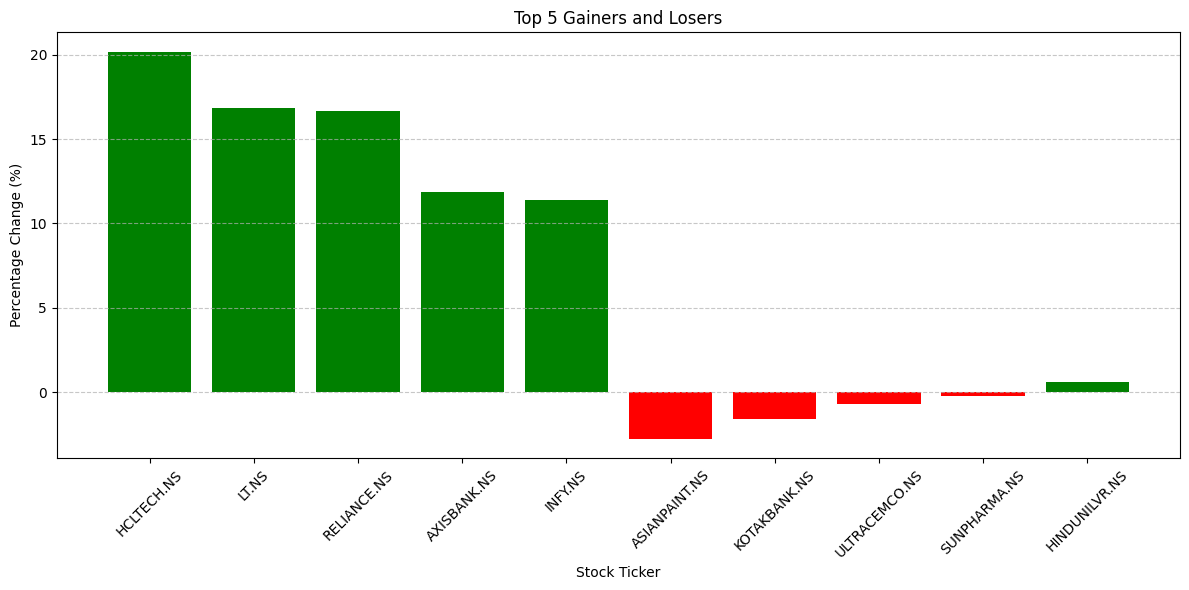

In [47]:
combined = pd.concat([top, bottom]) #combining the 2 DataFrames
plt.figure(figsize=(12, 6))
bars = plt.bar(combined['Tickers'], combined['Percentage_change'],
                color=['green' if x >= 0 else 'red' for x in combined['Percentage_change']]) #red for negative returns and green for positive
plt.xticks(rotation=45) #readability 
plt.title('Top 5 Gainers and Losers')
plt.xlabel('Stock Ticker')
plt.ylabel('Percentage Change (%)')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7) #grid for better visibility 
plt.show()

In [48]:
filename='stock_percent.csv' #to save all the percentage change data to a CSV with this name 
pd_change.to_csv(filename, index=False)
print(f"Saved to {filename}") 

Saved to stock_percent.csv
